### LSTM for time series forecast

- Long short-term memory recurrent neural networks are capable of automatically learning features from sequence data, and can output a variable
length sequences that can be used for multi-step forecasting. 

#### This notebook shows how to use an Encoder-Decoder LSTM With Univariate Input for time series forecast. 

### Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from tensorflow.keras import metrics

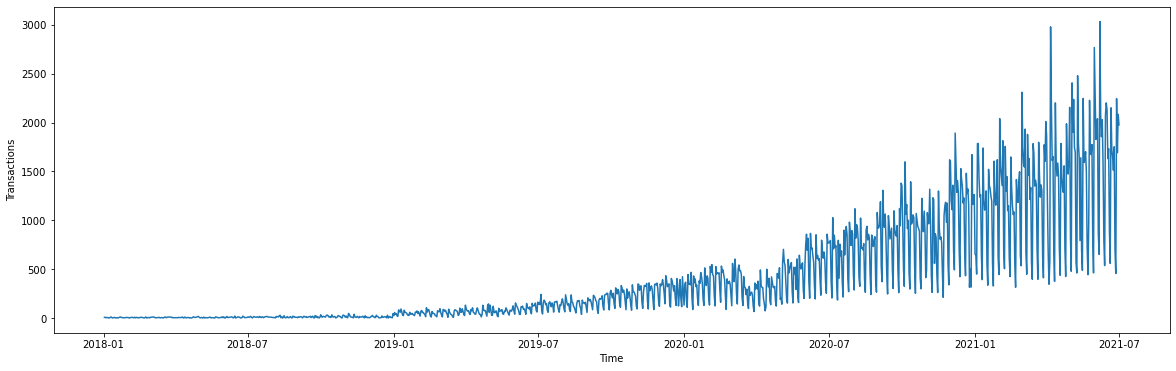

In [2]:
trs = pd.read_csv("data/transactions.csv")

trs['date'] = pd.to_datetime(trs['date'])
t2day = trs['date'].value_counts().sort_values()
t2day = t2day.to_frame()

plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Transactions")
plt.plot(t2day.date.sort_index())
plt.show()

### Prepare the data for the neural network

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
         # find the end of this pattern
         end_ix = i + n_steps_in
         out_end_ix = end_ix + n_steps_out
         # check if we are beyond the sequence
         if out_end_ix > len(sequence):
             break
         # gather input and output parts of the pattern
         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
         X.append(seq_x)
         y.append(seq_y)
    return np.array(X), np.array(y)

series = six_months = t2day.date.sort_index().values

# choose a number of time steps
n_steps_in, n_steps_out = 60, 30

# split into samples
X, y = split_sequence(series, n_steps_in, n_steps_out)
count = 0
for i in range(len(X)):
    print(X[i], y[i])
    count +=1
    if count>5: break

[ 7  8  3  7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7
  6  1  7  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8
 12  7  2  4  4  7  2  4  5  4  1  6] [11  8  3 10 10 10 10  3  6  4  4  4  7  5  6 11  3  1 10  6  1  6  6  5
  1  4  1  2  7 13]
[ 8  3  7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7  6
  1  7  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8 12
  7  2  4  4  7  2  4  5  4  1  6 11] [ 8  3 10 10 10 10  3  6  4  4  4  7  5  6 11  3  1 10  6  1  6  6  5  1
  4  1  2  7 13  8]
[ 3  7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7  6  1
  7  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8 12  7
  2  4  4  7  2  4  5  4  1  6 11  8] [ 3 10 10 10 10  3  6  4  4  4  7  5  6 11  3  1 10  6  1  6  6  5  1  4
  1  2  7 13  8  7]
[ 7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7  6  1  7
  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8 12  7  2
  4  4  7  2  4  5  4  

#### Prepare training and test set. 

In [8]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))

In [9]:
train_size = int(len(X) * 0.75)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]
print(len(train_X), len(train_y), len(test_X), len(test_y))

857 857 286 286


#### Define the neural network model.

In [10]:
# define model
model = Sequential()
model.add(LSTM(40, activation='relu', input_shape=(n_steps_in, n_features))) 
model.add(RepeatVector(n_steps_out))
model.add(LSTM(40, activation='relu', return_sequences=True)) 
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse',metrics=[metrics.mae, 'mae'] )
# fit model
history = model.fit(train_X, train_y, epochs=150, verbose=2)

Epoch 1/150
27/27 - 4s - loss: 87853.2734 - mean_absolute_error: 192.2890 - mae: 192.2890
Epoch 2/150
27/27 - 1s - loss: 65156.7578 - mean_absolute_error: 161.6956 - mae: 161.6956
Epoch 3/150
27/27 - 1s - loss: 57938.7930 - mean_absolute_error: 150.3618 - mae: 150.3618
Epoch 4/150
27/27 - 1s - loss: 78722.0703 - mean_absolute_error: 163.3465 - mae: 163.3465
Epoch 5/150
27/27 - 1s - loss: 77187.8359 - mean_absolute_error: 171.1612 - mae: 171.1612
Epoch 6/150
27/27 - 1s - loss: 101685.6172 - mean_absolute_error: 175.3223 - mae: 175.3223
Epoch 7/150
27/27 - 1s - loss: 69519.0234 - mean_absolute_error: 153.3920 - mae: 153.3920
Epoch 8/150
27/27 - 1s - loss: 273183.7188 - mean_absolute_error: 187.0107 - mae: 187.0107
Epoch 9/150
27/27 - 1s - loss: 95291.9766 - mean_absolute_error: 168.1500 - mae: 168.1500
Epoch 10/150
27/27 - 1s - loss: 93020.8203 - mean_absolute_error: 166.5966 - mae: 166.5966
Epoch 11/150
27/27 - 1s - loss: 78475.1094 - mean_absolute_error: 162.0719 - mae: 162.0719
Epoch 

27/27 - 1s - loss: 39243.4414 - mean_absolute_error: 115.5184 - mae: 115.5184
Epoch 92/150
27/27 - 1s - loss: 39033.3203 - mean_absolute_error: 115.0823 - mae: 115.0823
Epoch 93/150
27/27 - 1s - loss: 38719.7031 - mean_absolute_error: 114.5400 - mae: 114.5400
Epoch 94/150
27/27 - 1s - loss: 38616.2656 - mean_absolute_error: 114.2217 - mae: 114.2217
Epoch 95/150
27/27 - 1s - loss: 38275.1328 - mean_absolute_error: 113.3182 - mae: 113.3182
Epoch 96/150
27/27 - 1s - loss: 37887.2930 - mean_absolute_error: 112.2279 - mae: 112.2279
Epoch 97/150
27/27 - 1s - loss: 37648.0586 - mean_absolute_error: 111.5578 - mae: 111.5578
Epoch 98/150
27/27 - 1s - loss: 37084.9648 - mean_absolute_error: 110.6742 - mae: 110.6742
Epoch 99/150
27/27 - 1s - loss: 36758.8906 - mean_absolute_error: 110.1963 - mae: 110.1963
Epoch 100/150
27/27 - 1s - loss: 36474.4375 - mean_absolute_error: 109.7595 - mae: 109.7595
Epoch 101/150
27/27 - 1s - loss: 36177.8633 - mean_absolute_error: 109.2771 - mae: 109.2771
Epoch 102/

In [79]:
history.history

{'loss': [64475.609375,
  60782.23828125,
  48159.56640625,
  53555.19921875,
  37069.28125,
  733893.6875,
  76177.4296875,
  55729.43359375,
  53400.03125,
  53889.73046875,
  579053.125,
  1172922.375,
  90696.953125,
  55680.765625,
  55531.8984375,
  152430.578125,
  1824258944.0,
  3173405440.0,
  135700560.0,
  336285952.0,
  578307392.0,
  215359792.0,
  156169792.0,
  501488192.0,
  212681120.0,
  129972560.0,
  23122960.0,
  11924290.0,
  10248079.0,
  8889268.0,
  7458975.0,
  14060714.0,
  13480001.0,
  11891545.0,
  16731481.0,
  26752428.0,
  15896672.0,
  10539479.0,
  8916652.0,
  10663348.0,
  17520586.0,
  12516858.0,
  9413897.0,
  8684949.0,
  7422641.5,
  5869868.0,
  12604468.0,
  12643689.0,
  10343867.0,
  9483143.0,
  8748130.0,
  8112507.0,
  7531169.0,
  6961407.0,
  6314068.0,
  11142855.0,
  9718609.0,
  7633424.5,
  6362727.5,
  5407999.5,
  4770737.0,
  4265667.0,
  3885851.5,
  3659209.5,
  3412182.75,
  3175317.5,
  2990775.5,
  2836504.5,
  2699471.25,

### Plot training history

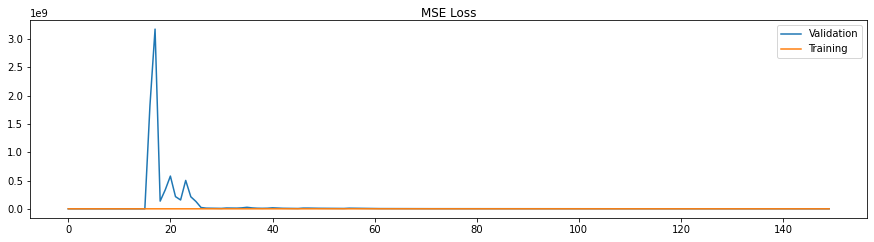

In [80]:
# plot loss learning curves
plt.figure(figsize = (15, 8))
plt.subplot(211)
plt.title('MSE Loss', pad=-40)
plt.plot(history.history['loss'], label='Validation') 
plt.plot(history.history['mean_absolute_error'], label='Training')
plt.legend()


### Show the first prediction using the model that you already trained

In [81]:
# demonstrate prediction
x_input = np.array([  7,  8,  3,  7,  4,  1,  5, 11,  8,  1,  
                    7 , 1,  2 , 4 , 1, 12,  6 , 6 , 4,  4 ,
                    2 , 6,  6,  7 ,6 , 1 , 7,  7,  5 , 3])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[[-0.28277943]
  [ 2.6647122 ]
  [ 2.3996212 ]
  [ 7.33515   ]
  [-0.43588898]
  [-1.2393234 ]
  [-0.5119312 ]
  [ 7.0498385 ]
  [-2.9350243 ]
  [14.224358  ]
  [-0.2877662 ]
  [ 0.3806136 ]
  [ 5.290053  ]
  [ 9.773008  ]
  [ 7.031861  ]
  [ 4.6312394 ]
  [ 5.8527007 ]
  [ 4.563806  ]
  [ 4.146072  ]
  [ 4.550636  ]
  [ 2.26983   ]
  [ 4.615619  ]
  [ 0.41531494]
  [ 4.7977843 ]
  [-1.3924406 ]
  [ 5.14251   ]
  [ 9.959901  ]
  [ 2.8901846 ]
  [ 6.8231697 ]
  [ 3.4554045 ]]]


Mean Absolute Error =  1510.6981314554237


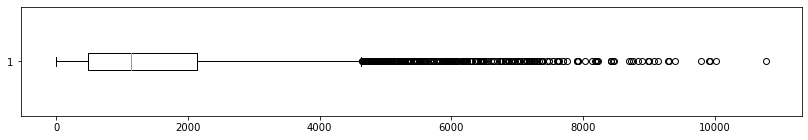

In [82]:
# predict and compute error
predicted = np.array([])

for i in range(len(test_X)):
    # x_input = X[i].reshape((1, n_steps))
    x_input = test_X[i].reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 


expected = test_y
expected = np.reshape(expected, (expected.shape[0]*expected.shape[1]))
# abs difference
difference = abs((expected - predicted))

print('Mean Absolute Error = ', np.mean(difference))
# show boxplot
plt.figure(figsize = (14,2))
plt.boxplot(difference, vert= False);
plt.show()